In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import imp
import minimetagenome_analysis as minimeta
#imp.reload(minimeta)

import reassembly as rea
import subcluster_bins as sub
import checkm_out_plot as cop
import checkm_out as co

this is a continuation (& cleaned up version of 201810_permafrost_analysis)
where I continue with post reassembly pruning

# WestDock version

In [4]:
%pwd

'/home/bojk/Data'

In [5]:
expt_name = 'WestDock'

In [8]:
imp.reload(rea)
#readf = None
contigdf = rea.make_CS_df_new_index('Permafrost/'+expt_name+'/bins/fasta/reassembly/reassembled_withmini/')#linux
#FBreadf = rea.make_CS_df_new_index('Permafrost/FranklinBluffs/reassembly_files/')#mac
#SMreadf5kb = SMreadf[SMreadf['length_linecount']>=5e3]

/home/bojk/Data/minimeta_pyfiles/reassembly.py:217: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  time_elapsed = datetime.now() - start_time
/home/bojk/Data/minimeta_pyfiles/reassembly.py:218: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  print('Added read count and saved, time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


Added read count and saved, time elapsed (hh:mm:ss.ms) 0:02:37.777901
5874 contigs above 5kb for reassembled WestDock


In [10]:
contigdf.head()

,Bin,length,30cm_mean,30cm_std,30cm_median,absCov_30cm,norCov_30cm,length_linecount,GC,length_from_fasta,length_diff(abs),length_diff(%),expt_name,new_index
000_NODE_001,000,31142.0,7.627159,3.004316,7.0,2032.0,0.065250,31142.0,0.595755,31142.0,0.0,0,WestDock,WestDock_bin_000_000_NODE_001
000_NODE_002,000,23345.0,9.327479,3.439252,9.0,1860.0,0.079627,23345.0,0.592191,23359.0,14.0,0.0599341,WestDock,WestDock_bin_000_000_NODE_002
000_NODE_003,000,17621.0,13.543045,4.522554,13.0,2052.0,0.116452,17621.0,0.610805,17621.0,0.0,0,WestDock,WestDock_bin_000_000_NODE_003
000_NODE_004,000,15030.0,9.163273,3.601880,9.0,1180.0,0.078510,15030.0,0.591151,15030.0,0.0,0,WestDock,WestDock_bin_000_000_NODE_004
000_NODE_005,000,13920.0,9.816451,4.496361,10.0,1162.0,0.083477,13920.0,0.604670,13920.0,0.0,0,WestDock,WestDock_bin_000_000_NODE_005


In [12]:
contigdf.groupby('Bin').sum()['length_from_fasta'].sort_values(ascending=False).head()


Bin
039    9666652.0
046    2193102.0
009    1975570.0
075    1954394.0
015    1747864.0
Name: length_from_fasta, dtype: float64

In [14]:
len(contigdf)
contigdf[contigdf['Bin']=='000']['length_from_fasta'].median() # this should be N50

8712.0

In [25]:
#compare checkms 
import sinaplot as sin
imp.reload(cop)
indir_reassembly = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/reassembled/checkm/'
indir_reassembly_wmini = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/reassembled_withmini/checkm/'
indir_originals = 'Permafrost/'+expt_name+'/bins/fasta/originals/checkm/'
chkm_orig = co.make_checkm_output_df(indir_originals,'tempcheckmdf')
chkm_orig['dataset'] = 'original'
chkm_reas = co.make_checkm_output_df(indir_reassembly,'tempcheckmdf')
chkm_reas['dataset'] = 'bulk only'
chkm_reaswm = co.make_checkm_output_df(indir_reassembly_wmini,'tempcheckmdf')
chkm_reaswm['dataset'] = 'with mini'

/home/bojk/Data/minimeta_pyfiles/checkm_out.py:41: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  strhet = pd.read_table(indir+'outputfile.txt')


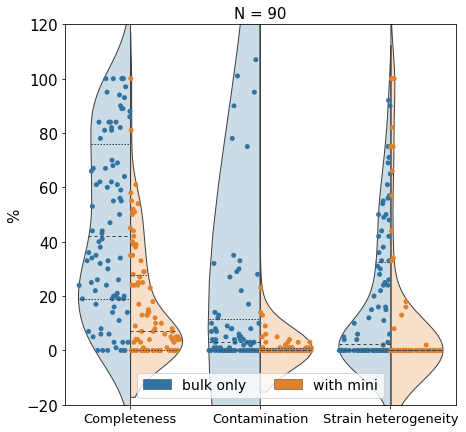

In [70]:
imp.reload(cop)
cop.compare_two_checkmdfs_sina(chkm_reas,chkm_reaswm,'dataset',indir_reassembly_wmini,expt_name+'_comparison_reassembly_miniOrNot_wviolin')        

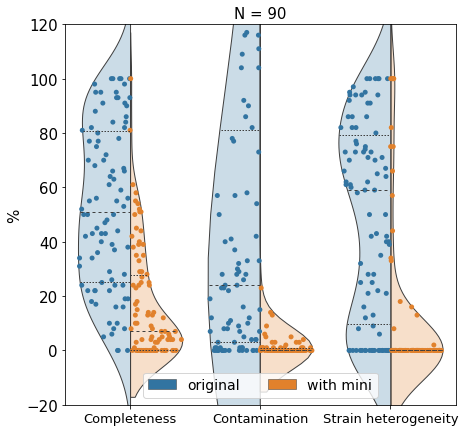

In [72]:
cop.compare_two_checkmdfs_sina(chkm_orig,chkm_reaswm,'dataset',indir_reassembly_wmini,expt_name+'_comparison_reassembly_pre_post_reassWM')        

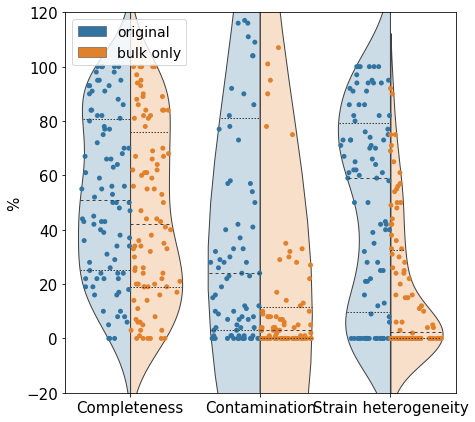

In [58]:
imp.reload(cop)
cop.compare_two_checkmdfs_sina(chkm_orig,chkm_reas,'dataset',indir_reassembly,expt_name+'_comparison_reassembly_pre_post_reass')        

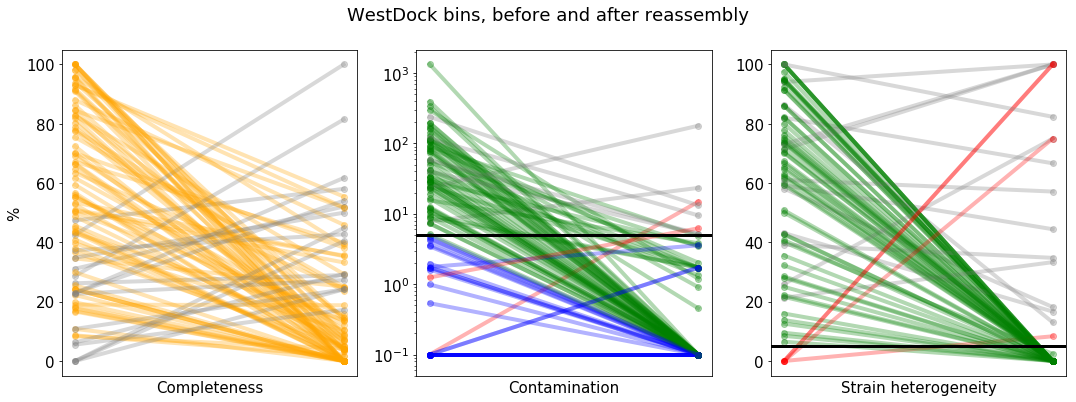

In [95]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['legend.fontsize'] = 14

f,ax = plt.subplots(1,3,figsize=(18,6))
kwargs = {'linewidth':4,'alpha':.3}
for i in range(len(chkm_orig)):
    y = [chkm_orig.sort_index()['Completeness'][i],chkm_reaswm.sort_index()['Completeness'][i]]
    if y[0]>y[1]:
        ax[0].plot([1,2],y,'-o',color='orange',**kwargs)
    else:
        ax[0].plot([1,2],y,'-o',color='gray',**kwargs)

for i in range(len(chkm_orig)):
    y = [chkm_orig.sort_index()['Contamination'][i],chkm_reaswm.sort_index()['Contamination'][i]]
    ylogready = [.1 if f<.1 else f for f in y]
    y=ylogready
    if y[0]>5 and y[1]<5:
        ax[1].plot([1,2],y,'-og',**kwargs)
    elif y[0]<5 and y[1]>5:
        ax[1].plot([1,2],y,'-or',**kwargs)
    elif y[0]<5 and y[1]<5:
        ax[1].plot([1,2],y,'-ob',**kwargs)
    else:
        ax[1].plot([1,2],y,'-o',color='gray',**kwargs)

for i in range(len(chkm_orig)):
    y = [chkm_orig.sort_index()['Strain heterogeneity'][i],chkm_reaswm.sort_index()['Strain heterogeneity'][i]]
    if y[0]>5 and y[1]<5:
        ax[2].plot([1,2],y,'-og',**kwargs)
    elif y[0]<5 and y[1]>5:
        ax[2].plot([1,2],y,'-or',**kwargs)
    elif y[0]<5 and y[1]<5:
        ax[1].plot([1,2],y,'-ob',**kwargs)
    else:
        ax[2].plot([1,2],y,'-o',color='gray',**kwargs)
#ax[1].set_ylim(top=120,bottom=-5)
ax[0].set_ylabel('%')
ax[1].set_yscale('log')
ax[1].set_ylim(bottom=.05)
ax[1].axhline(5,color='k',linewidth=3)
ax[2].axhline(5,color='k',linewidth=3)
ax[0].set_xlabel('Completeness')
ax[1].set_xlabel('Contamination')
ax[2].set_xlabel('Strain heterogeneity')
#loc,label = plt.xticks()
#label = ['before' if i==0 else 'after' if i==len(loc)-1 else '' for i in range(len(loc))]
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])

plt.suptitle(expt_name+' bins, before and after reassembly')

f.savefig(indir_reassembly_wmini+expt_name+'_reassemblyQ_linkplot.png')

In [80]:
label

['before', '', '', '', '', '', '', 'after']

In [23]:
"""#FBreadf5kb = FBreadf[FBreadf['length']>=5000]
f, ax = plt.subplots(4,2, sharex=True,figsize=(12,24))
bin000 = SMreadf5kb[SMreadf5kb['Bin']=='039']
d1 = '15cm'
d2 = '25cm'
ax[0][0].scatter(bin000['GC'],bin000['absCov_'+d1],s=bin000['length']/1e2,alpha=.3)
ax[0][0].set_title('absCov_'+d1)
ax[0][1].scatter(bin000['GC'],bin000['absCov_'+d2],s=bin000['length']/1e2,alpha=.3)
ax[0][1].set_title('absCov_'+d2)
ax[1][0].scatter(bin000['GC'],bin000['norCov_'+d1],s=bin000['length']/1e2,alpha=.3)
ax[1][0].set_title('norCov_'+d1)
ax[1][1].scatter(bin000['GC'],bin000['norCov_'+d2],s=bin000['length']/1e2,alpha=.3)
ax[1][1].set_title('norCov_'+d2)

ax[2][0].scatter(bin000['GC'],bin000[d1+'_mean'],s=bin000['length']/1e2,alpha=.3)
ax[2][0].set_title(d1+'_mean')
ax[2][1].scatter(bin000['GC'],bin000[d2+'_mean'],s=bin000['length']/1e2,alpha=.3)
ax[2][1].set_title(d2+'_mean')
ax[3][0].scatter(bin000['GC'],bin000[d1+'_median'],s=bin000['length']/1e2,alpha=.3)
ax[3][0].set_title(d1+'_median')
ax[3][1].scatter(bin000['GC'],bin000[d2+'_median'],s=bin000['length']/1e2,alpha=.3)
ax[3][1].set_title(d2+'_median')
#plt.xlim(0.3,.5)
plt.show()
"""

"#FBreadf5kb = FBreadf[FBreadf['length']>=5000]\nf, ax = plt.subplots(4,2, sharex=True,figsize=(12,24))\nbin000 = SMreadf5kb[SMreadf5kb['Bin']=='039']\nd1 = '15cm'\nd2 = '25cm'\nax[0][0].scatter(bin000['GC'],bin000['absCov_'+d1],s=bin000['length']/1e2,alpha=.3)\nax[0][0].set_title('absCov_'+d1)\nax[0][1].scatter(bin000['GC'],bin000['absCov_'+d2],s=bin000['length']/1e2,alpha=.3)\nax[0][1].set_title('absCov_'+d2)\nax[1][0].scatter(bin000['GC'],bin000['norCov_'+d1],s=bin000['length']/1e2,alpha=.3)\nax[1][0].set_title('norCov_'+d1)\nax[1][1].scatter(bin000['GC'],bin000['norCov_'+d2],s=bin000['length']/1e2,alpha=.3)\nax[1][1].set_title('norCov_'+d2)\n\nax[2][0].scatter(bin000['GC'],bin000[d1+'_mean'],s=bin000['length']/1e2,alpha=.3)\nax[2][0].set_title(d1+'_mean')\nax[2][1].scatter(bin000['GC'],bin000[d2+'_mean'],s=bin000['length']/1e2,alpha=.3)\nax[2][1].set_title(d2+'_mean')\nax[3][0].scatter(bin000['GC'],bin000[d1+'_median'],s=bin000['length']/1e2,alpha=.3)\nax[3][0].set_title(d1+'_media

OK, so median and mean are completely different here, let's have a look what's going on. 

In [30]:
bin000.sort_values('absCov_25cm',ascending=False).head()

,15cm_mean,15cm_median,15cm_std,25cm_mean,25cm_median,25cm_std,Bin,GC,absCov_15cm,absCov_25cm,...,length,length_diff(%),length_diff(abs),length_from_fasta,length_linecount,norCov_15cm,norCov_25cm,expt_name,new_index,depthfrac15cm
039_NODE_002,5.658722,3.0,7.084648,39.500038,39.0,9.727949,039,0.605802,1362.0,9266.0,...,26644.0,0.000000,0.0,26644.0,26644.0,0.051118,0.347771,SagMAT,SagMAT_bin_039_039_NODE_002,0.128152
039_NODE_001,8.941989,8.0,4.056286,10.937565,10.0,4.302443,039,0.636820,3822.0,4656.0,...,48370.0,0.000000,0.0,48370.0,48370.0,0.079016,0.096258,SagMAT,SagMAT_bin_039_039_NODE_001,0.450814
039_NODE_025,25.145353,25.0,13.487705,30.728433,26.0,18.194915,039,0.628551,3030.0,3736.0,...,13794.0,0.043478,6.0,13800.0,13794.0,0.219565,0.270725,SagMAT,SagMAT_bin_039_039_NODE_025,0.447827
039_NODE_036,7.902419,6.0,6.624831,34.354212,33.0,10.596980,039,0.614345,856.0,3664.0,...,11990.0,0.000000,0.0,11990.0,11990.0,0.071393,0.305588,SagMAT,SagMAT_bin_039_039_NODE_036,0.189381
039_NODE_022,4.598839,3.0,5.253472,29.105245,29.0,8.392813,039,0.635218,594.0,3634.0,...,14129.0,0.000000,0.0,14129.0,14129.0,0.042041,0.257202,SagMAT,SagMAT_bin_039_039_NODE_022,0.140492


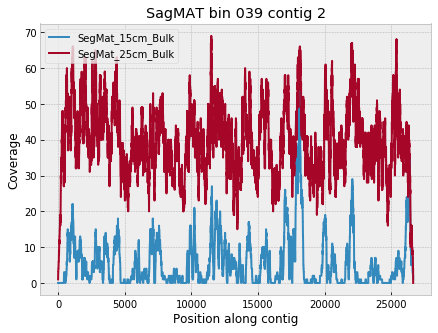

In [38]:
#pd.read_table('Permafrost/FranklinBluffs/bins/fasta/reassembly/shotgunReads_absoluteRealignmentReadCount.000.txt')
binn = '039'
env='linux'
colname = 'SegMat'
expt_name = 'SagMAT'
if env=='linux':
    bin_000 = pd.read_table('Permafrost/'+expt_name+'/bins/fasta/reassembly/shotgunReads_realignmentDepthProfile.'+binn+'.txt')#linux_quake
elif env=='mac':
    bin_000 = pd.read_table('Permafrost/'+expt_name+'/reassembly_files/shotgunReads_realignmentDepthProfile.'+binn+'.txt')#mac
f,ax = plt.subplots() 
plt.style.use(['bmh'])
#'NODE_16_length_9207_cov_5.81697'
#plt.rcParams.update(plt.rcParamsDefault)
num = '2'
bin_000[bin_000['ContigName'].str.contains('NODE_'+num+'_le')].reset_index()[[colname+'_'+d1+'_Bulk',colname+'_'+d2+'_Bulk']].plot(ax=ax,figsize=(7,5))
plt.ylabel('Coverage')
plt.xlabel('Position along contig')
plt.title(expt_name+' bin '+binn+' contig '+num)
#plt.gcf().subplots_adjust(left=0.25,right=0.99,bottom=0.43,top=0.99)
if env=='linux':
    f.savefig('Permafrost/'+expt_name+'/bins/fasta/reassembly/coverage_bin_'+binn+'_contig'+num+'.png')
    f.savefig('Permafrost/'+expt_name+'/bins/fasta/reassembly/coverage_bin_'+binn+'_contig'+num+'.pdf')
elif env=='mac':
    f.savefig('Permafrost/'+expt_name+'/reassembly_plots/coverage_bin_'+binn+'_contig'+num+'.png')
    f.savefig('Permafrost/'+expt_name+'/reassembly_plots/coverage_bin_'+binn+'_contig'+num+'.pdf')

In [39]:
SMreadf5kb.columns[SMreadf5kb.columns.str.contains('cm_mean')]

Index(['15cm_mean', '25cm_mean'], dtype='object')

In [40]:
SMreadf5kb.columns

Index(['15cm_mean', '15cm_median', '15cm_std', '25cm_mean', '25cm_median',
       '25cm_std', 'Bin', 'GC', 'absCov_15cm', 'absCov_25cm', 'class_count',
       'class_mean', 'class_median', 'length', 'length_diff(%)',
       'length_diff(abs)', 'length_from_fasta', 'length_linecount',
       'norCov_15cm', 'norCov_25cm', 'expt_name', 'new_index',
       'depthfrac15cm'],
      dtype='object')

# compare pre-post reassembly

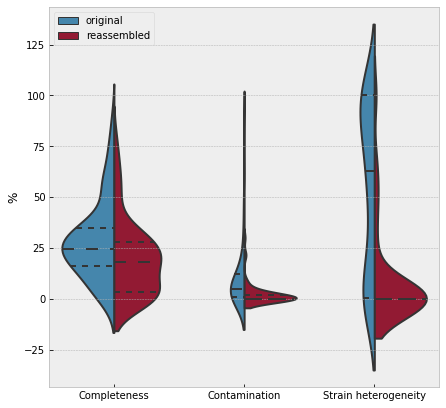

In [49]:
imp.reload(cop)
indir_reassembly = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/genomes_5kbfilter/CheckM/'
indir_originals = 'Permafrost/'+expt_name+'/bins/fasta/originals/checkm_SM/'
chkm_orig = co.make_checkm_output_df(indir_originals,'tempcheckmdf')
chkm_orig['dataset'] = 'original'
chkm_reas = co.make_checkm_output_df(indir_reassembly,'tempcheckmdf')
chkm_reas['dataset'] = 'reassembled'
cop.compare_two_checkmdfs(chkm_orig,chkm_reas,'dataset',indir_reassembly,expt_name+'_comparison_pre-post_reassembly')        

The completeness of these datasets really sucks.

## 1. bins that are ok before reassembly

In [416]:
okbefore = chkm_orig[(chkm_orig['Contamination']<=5)&(chkm_orig['Strain heterogeneity']<=5)].index
chkm_orig[(chkm_orig['Contamination']<=5)&(chkm_orig['Strain heterogeneity']<=5)][['Completeness','Contamination','Strain heterogeneity','Genome size']].sort_index()

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
SagMAT_bin_002,29.3718,0.294118,0.0,2472213
SagMAT_bin_007,22.6489,0,0.0,1206273
SagMAT_bin_010,19.8276,1.72414,0.0,1328834
SagMAT_bin_016,8.33333,4.16667,0.0,1582884
SagMAT_bin_020,4.16667,0,0.0,1421594
SagMAT_bin_034,36.442,3.44828,0.0,1658009
SagMAT_bin_037,0,0,0.0,925367
SagMAT_bin_040,23.4326,0,0.0,847440
SagMAT_bin_046,0,0,0.0,899960


In [445]:
okbefidx = ['genome_contigs_withBulk.'+f[-3:]+'.5000bp_filter' for f in okbefore]
chkm_reas[chkm_reas.index.isin(okbefidx)][['Completeness','Contamination','Strain heterogeneity','Genome size']]

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
genome_contigs_withBulk.034.5000bp_filter,36.442,3.44828,0.0,1440309
genome_contigs_withBulk.049.5000bp_filter,28.4483,1.72414,0.0,2145338
genome_contigs_withBulk.040.5000bp_filter,19.9843,0,0.0,723545
genome_contigs_withBulk.058.5000bp_filter,14.4587,1.7094,0.0,1413267
genome_contigs_withBulk.002.5000bp_filter,4.31034,0,0.0,572891
genome_contigs_withBulk.007.5000bp_filter,4.16667,0,0.0,353731
genome_contigs_withBulk.066.5000bp_filter,4.16667,0,0.0,838997
genome_contigs_withBulk.059.5000bp_filter,3.44828,0,0.0,1215279
genome_contigs_withBulk.064.5000bp_filter,3.44828,0,0.0,569007


## 2. bins that needed reassembly, and pass now

In [293]:
#chkm_orig[(chkm_orig['Contamination']>=5)|(chkm_orig['Strain heterogeneity']>=5)]

In [420]:
fastadir = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/genomes_5kbfilter/'
bins_for_reass = chkm_orig[(chkm_orig['Contamination']>=5)|(chkm_orig['Strain heterogeneity']>=5)].index.str[-3:]
indices = ['genome_contigs_withBulk.'+f+'.5000bp_filter' for f in bins_for_reass]
OK_after_reassembly = chkm_reas[chkm_reas.index.isin(indices)&(chkm_reas['Contamination']<=5)&(chkm_reas['Strain heterogeneity']<=5)].index
#chkm_reas.sort_index()[['Completeness','Contamination','Strain heterogeneity','Genome size']][30:]
#chkm_orig.sort_index()[['Completeness','Contamination','Strain heterogeneity','Genome size']]
OK_after_reassembly = [f+'.fasta' for f in OK_after_reassembly]
for bins in OK_after_reassembly:
    old = fastadir+bins
    new = fastadir+'OK_after_reassembly/'+bins
    os.rename(old,new)

## 3. bins that did not pass reassembly and need pruning

In [296]:
bins_for_pruning = chkm_reas[chkm_reas.index.isin(indices)&((chkm_reas['Contamination']>5)|(chkm_reas['Strain heterogeneity']>5))].index
chkm_reas[chkm_reas.index.isin(indices)&((chkm_reas['Contamination']>5)|(chkm_reas['Strain heterogeneity']>5))]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,dataset
0,,,,,,,,,,,,,,,,,
genome_contigs_withBulk.011.5000bp_filter,k__Bacteria,70.766,30.9671,232,1577787,924,108,161,1666,0.944434,0.68775,0.0131365,16369,6800.8,6258,0.00,reassembled
genome_contigs_withBulk.056.5000bp_filter,k__Bacteria,60.3448,8.62069,337,3978388,5449,58,104,4129,0.86192,0.604887,0.0176328,77675,11805.3,13529,0.00,reassembled
genome_contigs_withBulk.014.5000bp_filter,k__Bacteria,55.3498,9.21811,217,1505143,924,108,161,1623,0.944477,0.689725,0.0125698,21274,6936.14,6779,4.17,reassembled
genome_contigs_withBulk.041.5000bp_filter,k__Bacteria,51.0972,21.1599,417,2890306,5449,58,104,2910,0.926935,0.633962,0.015531,24149,6931.18,6499,42.31,reassembled
genome_contigs_withBulk.023.5000bp_filter,k__Bacteria,39.9687,22.884,278,2850000,5449,58,103,3036,0.889766,0.664321,0.0160687,42573,10251.8,10745,0.00,reassembled
genome_contigs_withBulk.042.5000bp_filter,c__Deltaproteobacteria,34.9631,2,260,2006401,83,155,247,1910,0.932765,0.65137,0.0106348,24924,7716.92,7506,50.00,reassembled
genome_contigs_withBulk.068.5000bp_filter,k__Bacteria,30.4075,0.940439,129,1020755,5449,58,104,1017,0.883537,0.554708,0.0108711,17768,7912.81,7909,66.67,reassembled
genome_contigs_withBulk.030.5000bp_filter,k__Bacteria,28.7083,3.64865,163,1051071,88,148,230,1029,0.927089,0.59197,0.0142665,18435,6448.27,6100,57.14,reassembled
genome_contigs_withBulk.024.5000bp_filter,k__Bacteria,25.8621,5.17241,127,1000581,5449,58,103,1025,0.908068,0.667115,0.0093067,18048,7878.57,7924,50.00,reassembled


In [58]:
import HTSeq

In [70]:
binn = '039'
file = '/home/bojk/Data/Permafrost/SagMAT/bins/fasta/originals/genome_cluster.'+binn+'.fasta'
file2 = '/home/bojk/Data/Permafrost/SagMAT/bins/fasta/reassembly/genome_contigs_withBulk.'+binn+'.fasta'
len_orig = [];len_reas=[]
for s in HTSeq.FastaReader(file):
    len_orig.append(len(s.seq))
for s in HTSeq.FastaReader(file2):
    len_reas.append(len(s.seq))

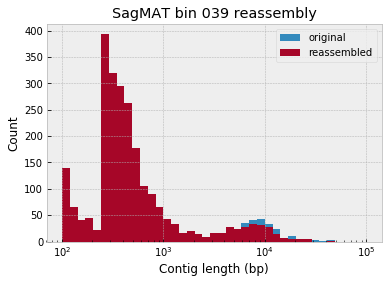

In [71]:
#old = plt.hist(len_orig,np.linspace(100,1e5,40))
f = plt.figure()
oldlog = plt.hist(len_orig,np.logspace(2,5,40))
newlog = plt.hist(len_reas,np.logspace(2,5,40))
plt.legend(['original','reassembled'])
plt.xlabel('Contig length (bp)')
plt.ylabel('Count')
plt.title('SagMAT bin '+binn+' reassembly')
plt.xscale('log')
f.savefig(indir_reassembly+'SM_bin_'+binn+'_reassembly.png')

In [79]:
sherlock_subsamples = pd.read_table('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples.txt')
newpath = '/scratch/users/berghuis/PermafrostSagMAT/'
sherlock_subsamples['biosample'] = newpath
sherlock_subsamples.to_csv('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples_new.txt','\t',index=False)

In [88]:
#pd.read_table('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples_new.txt')

# Pruning reassembled bins 

In [297]:
len(bins_for_pruning)

16

In [298]:
# won't be using this for SagMAT since there are only 16 reassembled bins that need pruning.
"""imp.reload(sub)
fastadir = 'Permafrost/FranklinBluffs/bins/fasta/reassembly/'
pickle = fastadir+'FranklinBluffs_reassembly_contig_stats.pickle'
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',
       'expt_name','write_fasta']
values = [30,1,'eom',True,'FranklinBluffs','YES']
kwargs = dict(zip(keys,values))
sub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)"""

"imp.reload(sub)\nfastadir = 'Permafrost/FranklinBluffs/bins/fasta/reassembly/'\npickle = fastadir+'FranklinBluffs_reassembly_contig_stats.pickle'\nkeys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',\n       'expt_name','write_fasta']\nvalues = [30,1,'eom',True,'FranklinBluffs','YES']\nkwargs = dict(zip(keys,values))\nsub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)"

# bin-specific parameter selection

In [315]:
import checkm_out as co

In [325]:
bins_for_pruning.sort_values()

Index(['genome_contigs_withBulk.011.5000bp_filter',
       'genome_contigs_withBulk.014.5000bp_filter',
       'genome_contigs_withBulk.015.5000bp_filter',
       'genome_contigs_withBulk.022.5000bp_filter',
       'genome_contigs_withBulk.023.5000bp_filter',
       'genome_contigs_withBulk.024.5000bp_filter',
       'genome_contigs_withBulk.030.5000bp_filter',
       'genome_contigs_withBulk.036.5000bp_filter',
       'genome_contigs_withBulk.039.5000bp_filter',
       'genome_contigs_withBulk.041.5000bp_filter',
       'genome_contigs_withBulk.042.5000bp_filter',
       'genome_contigs_withBulk.052.5000bp_filter',
       'genome_contigs_withBulk.056.5000bp_filter',
       'genome_contigs_withBulk.062.5000bp_filter',
       'genome_contigs_withBulk.068.5000bp_filter',
       'genome_contigs_withBulk.069.5000bp_filter'],
      dtype='object', name=0)

In [404]:
binn = '069'

In [405]:
chkm_orig[chkm_orig.index.str.contains('_'+binn)][['Completeness','Contamination','Strain heterogeneity','Genome size']]

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
SagMAT_bin_069,16.6667,8.33333,0.0,3382122


In [406]:
chkm_reas[chkm_reas.index.str.contains('.'+binn+'.')][['Completeness','Contamination','Strain heterogeneity','Genome size']].sort_values(0)

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
genome_contigs_withBulk.069.5000bp_filter,16.6667,8.33333,0.0,2843256


In [409]:
imp.reload(sub)
fastadir = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/genomes_5kbfilter/'
pickle = fastadir+expt_name+'_reassembly_contig_stats.pickle'
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',
       'expt_name','write_fasta','Bin','GC_sensitive']#,'GCmin','GCmax']
values = [45,1,'eom',False,expt_name,'NO',binn,'YES']#,.65,.79]
kwargs = dict(zip(keys,values))
sub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

#  now rewrite all fastas

In [411]:
imp.reload(sub)
sub.write_subfasta_from_jsonparams(pickle,fastadir+'pruning/json/',fastadir)

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

# make final collection of bins SM

In [413]:
indir = fastadir+'pruning/checkm/'
checkm_pruned2 = co.make_checkm_output_df(indir,'SM_pruned')

In [421]:
OK_after_pruning = checkm_pruned2[(checkm_pruned2['Contamination']<=5)&(checkm_pruned2['Strain heterogeneity']<=5)].index#.head()
OK_after_pruning = [f+'.fasta' for f in OK_after_pruning]
for bins in OK_after_pruning:
    old = fastadir+'pruning/fastas/'+bins
    new = fastadir+'pruning/fastas/OK_after_pruning/'+bins
    os.rename(old,new)

Bins that passed are now in three separate subfolders. First I'll have to make a choice for which bins to choose (prune depth), then merge and find an renaming system. Then repeat for WestDock.

In [426]:
#checkm_pruned2[(checkm_pruned2['Contamination']<=5)&(checkm_pruned2['Strain heterogeneity']<=5)].sort_index() 


In [464]:
"""finaldir = 'Permafrost/SagMAT/bins/fasta/reassembly/FINAL_BINS_SAGMAT/'
final_bin_names_old = [f for f in os.listdir(finaldir) if '.fasta' in f]
name_change_df = pd.DataFrame(index=range(len(final_bin_names_old)),columns=['original_name','new_name'])
name_change_df['original_name'] = np.sort(final_bin_names_old)
name_change_df['new_name'] = ['Permafrost_'+expt_name+'_bin_'+str("{0:0=3d}".format(f))+'.fasta' for f in name_change_df.index] 
name_change_df['origin'] = ['reassembled & pruned' if 'SagMAT' in f else 'reassembled' if '5000bp' in f else 'original' if 'genome_cluster' in f else '' for f in name_change_df.original_name]    
name_change_df['checkm_idx_names'] = [origs[origs.str.contains(f[-9:-6])].values[0] if 'SagMAT_bin_'+f[-9:-6] in origs and 'genome_cluster' in f else f[:-6] for f in name_change_df.original_name]
name_change_df.to_csv(finaldir+expt_name+'_finalNameConversion.txt','\t')"""

In [444]:
# renaming files in finaldir
# see tab file for references to origin (will import to google sheets as well)
"""for bins in name_change_df.index:
    old = finaldir+name_change_df.loc[bins,'original_name']
    new = finaldir+name_change_df.loc[bins,'new_name']
    os.rename(old,new)"""

In [451]:
origs = chkm_orig[(chkm_orig['Contamination']<=5)&(chkm_orig['Strain heterogeneity']<=5)].index
#origs = ['genome_cluster.'+f[-3:]+'.fasta' for f in origs]

In [475]:
name_change_df = pd.read_table(finaldir+expt_name+'_finalNameConversion.txt',index_col=False)
name_change_df['checkm_idx_names'] = [origs[origs.str.contains(f[-9:-6])].values[0] if 'SagMAT_bin_'+f[-9:-6] in origs and 'genome_cluster' in f else f[:-6] for f in name_change_df.original_name]
name_change_df.drop('Unnamed: 0',axis=1,inplace=True)
name_change_df.head()

,original_name,new_name,origin,checkm_idx_names
0,SagMAT_bin_014_15cm_sub_bin_000.fasta,Permafrost_SagMAT_bin_000.fasta,reassembled & pruned,SagMAT_bin_014_15cm_sub_bin_000
1,SagMAT_bin_015_15cm_sub_bin_000.fasta,Permafrost_SagMAT_bin_001.fasta,reassembled & pruned,SagMAT_bin_015_15cm_sub_bin_000
2,SagMAT_bin_022_25cm_sub_bin_000.fasta,Permafrost_SagMAT_bin_002.fasta,reassembled & pruned,SagMAT_bin_022_25cm_sub_bin_000
3,SagMAT_bin_024_15cm_sub_bin_000.fasta,Permafrost_SagMAT_bin_003.fasta,reassembled & pruned,SagMAT_bin_024_15cm_sub_bin_000
4,SagMAT_bin_030_25cm_sub_bin_000.fasta,Permafrost_SagMAT_bin_004.fasta,reassembled & pruned,SagMAT_bin_030_25cm_sub_bin_000


In [486]:
#now merge the relevant indices of the 3 checkm dataframes
final_checkm = chkm_orig[chkm_orig.index.isin(list(name_change_df.checkm_idx_names))].append(chkm_reas[chkm_reas.index.isin(list(name_change_df.checkm_idx_names))])    
final_checkm = final_checkm.append(checkm_pruned2[checkm_pruned2.index.isin(list(name_change_df.checkm_idx_names))])
final_checkm['New_name'] = [name_change_df[name_change_df.checkm_idx_names==f]['new_name'].values[0][:-6] for f in final_checkm.index]

In [489]:
final_checkm.to_pickle(finaldir+expt_name+'_finalCheckmPickle')
final_checkm.to_csv(finaldir+expt_name+'_finalCheckm.txt','\t')

In [279]:
bid  = 123
profit = []
for box in np.random.randint(0,1000,10000):
    if box<=bid:
        profit.append(2*box-bid)
print(np.sum(profit))

3213


In [148]:
np.random.random_integers(0,1000,10)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  """Entry point for launching an IPython kernel.


array([411, 651, 545, 265, 436, 949,   2, 246, 275, 951])

In [98]:
np.random.randint(0,1000,10)

array([146, 990, 943, 665, 864, 613, 466,  47, 811, 653])

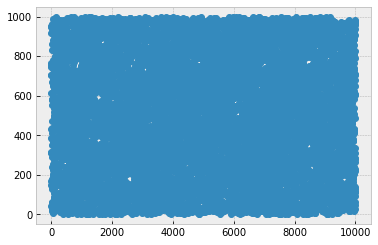

In [284]:
profit

plt.plot(np.random.randint(0,1000,10000),'o')